Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('student_performance.csv')
df

,Student ID,Gender,Age,School,math_score,reading_score,writing_score,class_performance
0,1,Male,17,B,76.0,86.0,80.0,B
1,2,Male,19,B,43.0,66.0,38.0,F
2,3,Male,17,E,88.0,94.0,95.0,A
3,4,Female,17,A,NaN,66.0,85.0,D
4,5,Male,17,B,38.0,69.0,64.0,F
...,...,...,...,...,...,...,...,...
6995,6996,Male,19,D,99.0,63.0,33.0,D
6996,6997,Female,20,C,48.0,NaN,84.0,F
6997,6998,Male,20,D,28.0,65.0,79.0,F
6998,6999,Female,20,E,62.0,74.0,48.0,D


In [3]:
df.isnull().sum()

Student ID             0
Gender                 0
Age                    0
School                 0
math_score           369
reading_score        351
writing_score        349
class_performance      0
dtype: int64

In [5]:
df.rename(columns={'math_score':'Math_Score','reading_score':'Reading_Score','writing_score':'Writing_Score'},inplace=True)

In [6]:
df

,Student ID,Gender,Age,School,Math_Score,Reading_Score,Writing_Score,class_performance
0,1,Male,17,B,76.0,86.0,80.0,B
1,2,Male,19,B,43.0,66.0,38.0,F
2,3,Male,17,E,88.0,94.0,95.0,A
3,4,Female,17,A,NaN,66.0,85.0,D
4,5,Male,17,B,38.0,69.0,64.0,F
...,...,...,...,...,...,...,...,...
6995,6996,Male,19,D,99.0,63.0,33.0,D
6996,6997,Female,20,C,48.0,NaN,84.0,F
6997,6998,Male,20,D,28.0,65.0,79.0,F
6998,6999,Female,20,E,62.0,74.0,48.0,D


In [7]:
df['Math_Score'] = df['Math_Score'].fillna(df['Math_Score'].mean())
df['Reading_Score'] = df['Reading_Score'].fillna(df['Reading_Score'].mean())
df['Writing_Score'] = df['Writing_Score'].fillna(df['Writing_Score'].mean())
df

,Student ID,Gender,Age,School,Math_Score,Reading_Score,Writing_Score,class_performance
0,1,Male,17,B,76.000000,86.000000,80.0,B
1,2,Male,19,B,43.000000,66.000000,38.0,F
2,3,Male,17,E,88.000000,94.000000,95.0,A
3,4,Female,17,A,61.655859,66.000000,85.0,D
4,5,Male,17,B,38.000000,69.000000,64.0,F
...,...,...,...,...,...,...,...,...
6995,6996,Male,19,D,99.000000,63.000000,33.0,D
6996,6997,Female,20,C,48.000000,62.230862,84.0,F
6997,6998,Male,20,D,28.000000,65.000000,79.0,F
6998,6999,Female,20,E,62.000000,74.000000,48.0,D


In [8]:
df.describe()

,Student ID,Age,Math_Score,Reading_Score,Writing_Score
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,18.981571,61.655859,62.230862,62.009773
std,2020.870275,1.418079,21.743450,21.708977,21.652401
min,1.000000,17.000000,0.000000,0.000000,0.000000
25%,1750.750000,18.000000,43.000000,44.000000,44.000000
50%,3500.500000,19.000000,61.655859,62.230862,62.009773
75%,5250.250000,20.000000,80.000000,81.000000,80.000000
max,7000.000000,21.000000,100.000000,100.000000,100.000000


Visualizing Distributions of numeric variables

<Axes: xlabel='Math_Score', ylabel='Count'>

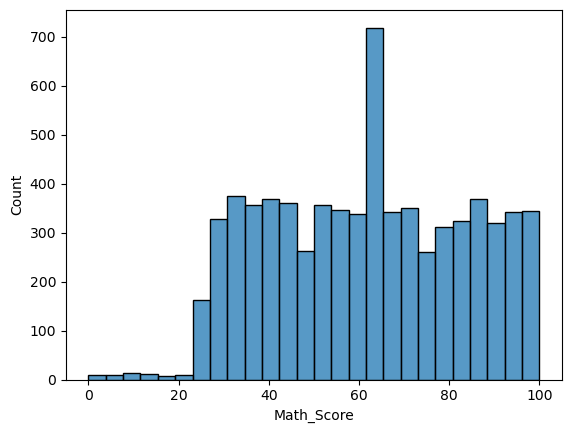

In [9]:
sns.histplot(df['Math_Score'])

<Axes: xlabel='Reading_Score', ylabel='Count'>

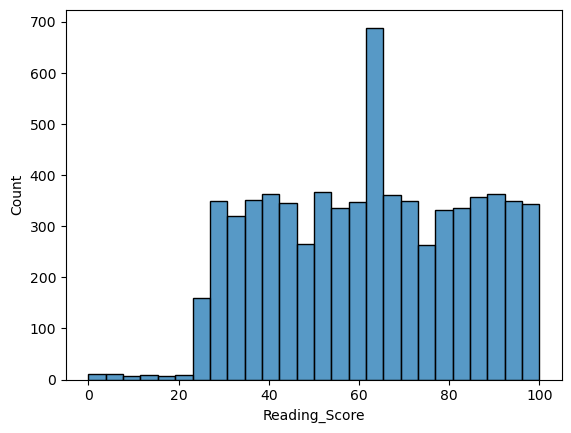

In [10]:
sns.histplot(df['Reading_Score'])

<Axes: xlabel='Writing_Score', ylabel='Count'>

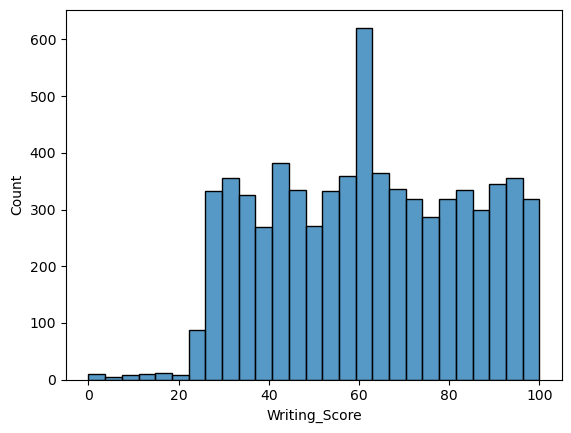

In [11]:
sns.histplot(df['Writing_Score'])

Label Encoding

In [ ]:
df.loc[ df.School == "A" , "School" ] = 1
df.loc[ df.School == "B" , "School" ] = 2
df.loc[ df.School == "C" , "School" ] = 3
df.loc[ df.School == "D" , "School" ] = 4
df.loc[ df.School == "E" , "School" ] = 5

Handling outliers via use of iqr

In [12]:
def remove_outliers( feature_name = str):
    global tempdf
    q1 = np.percentile(df[feature_name], 25, method='midpoint')
    q3 = np.percentile(df[feature_name], 75, method='midpoint')
    iqr = q3 - q1
    tempdf = df[ (df[feature_name] >= q3 - 1.5 * iqr) & (df[feature_name] <= q1 + 1.5 * iqr) ]
    return tempdf

new = remove_outliers('Math_Score')

<Axes: xlabel='Math_Score', ylabel='Count'>

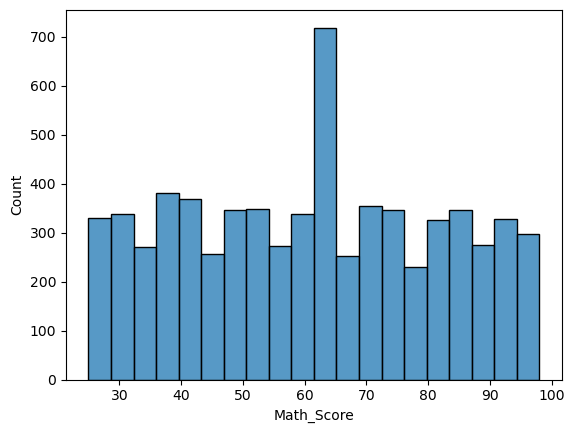

In [13]:
sns.histplot(new.Math_Score)

In [14]:
new.describe()

,Student ID,Age,Math_Score,Reading_Score,Writing_Score
count,6729.000000,6729.000000,6729.000000,6729.000000,6729.000000
mean,3489.207460,18.990192,60.989005,62.187322,61.969574
std,2018.743014,1.415020,20.568488,21.687860,21.704075
min,1.000000,17.000000,25.000000,0.000000,0.000000
25%,1736.000000,18.000000,43.000000,44.000000,44.000000
50%,3485.000000,19.000000,61.655859,62.230862,62.009773
75%,5236.000000,20.000000,78.000000,80.000000,80.000000
max,7000.000000,21.000000,98.000000,100.000000,100.000000


In [15]:
tdf = df.copy()

Q1 = df['Math_Score'].quantile(0.25)
Q3 = df['Math_Score'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['Math_Score'] >= upper)[0]
lower_array = np.where(df['Math_Score'] <= lower)[0]
 
# Removing the outliers
tdf.drop(index=upper_array, inplace=True)
tdf.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", tdf.shape)

New Shape:  (7000, 8)


In [16]:
df.dtypes

Student ID             int64
Gender                object
Age                    int64
School                object
Math_Score           float64
Reading_Score        float64
Writing_Score        float64
class_performance     object
dtype: object

<Axes: >

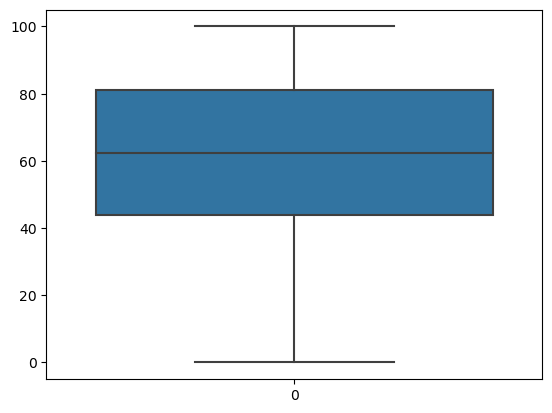

In [17]:
sns.boxplot(df['Reading_Score'])

Data_Transformations

In [21]:
def grade(x):
    if x<120:
        return 'F'
    elif x>=120 and x<150:
        return 'E'
    elif x>=150 and x<180:
        return 'D'
    elif x>=180 and x<210:
        return 'C'
    elif x>=210 and x<240:
        return 'B'
    elif x>=240 and x<270:
        return 'A'
    else:
        return 'A+'

In [26]:
df['Grade'] = (df['Math_Score'] + df['Reading_Score'] + df['Writing_Score'])
df['Grade'] = df['Grade'].apply(grade)

In [28]:
df['Grade'].value_counts()

Grade
C     2028
D     1859
B     1350
E      939
A      484
F      264
A+      76
Name: count, dtype: int64